# Insurance Cost Prediction

In [1]:
# importing all the necessary libraries

import pandas as pd    
import numpy as np             
import seaborn as sns  
import matplotlib.pyplot as plt     
import warnings 

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
# storing the path of our data file in a variable

filepath='C:/Users/Shash/Desktop/insurance.csv'

In [3]:
# loading the data from the data file into the dataframe

data=pd.read_csv(filepath)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**This data has a shape of 1337 rows and 7 columns with zero null values and the data types are all correct.**

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
# finding the number of unique values in a column

data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
# number of duplicates in the data

data.duplicated().sum()

1

In [8]:
# printing first 5 elements of dataframe

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# printing last 5 elements of dataframe

data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **Exploratory Data Analysis**

## **i) Estimates of Location**

#### **1) Mean**

In [11]:
round(data[['age','bmi','children','charges']].mean())

age            39.0
bmi            31.0
children        1.0
charges     13270.0
dtype: float64

#### **2) Trim Mean**

In [12]:
from scipy.stats import trim_mean
cols=['age','bmi','children','charges']
for index in cols:
    print(f"{str(index).capitalize()} : {trim_mean(data[index].sort_values(ascending=False),0.1):,.0f}")

Age : 39
Bmi : 31
Children : 1
Charges : 11,076


#### **3) Weighted Mean of Charges**

In [13]:
print(f"Charges based on Age : ${np.average(data['charges'],weights=data['age']):,.2f}")
print(f"Charges based on BMI : ${np.average(data['charges'],weights=data['bmi']):,.2f}")
print(f"Charges based on No. of Children : ${np.average(data['charges'],weights=data['children']):,.2f}")

Charges based on Age : $14,567.05
Charges based on BMI : $13,747.75
Charges based on No. of Children : $14,176.36


#### **4) Median**

In [14]:
round(data[['age','bmi','children','charges']].median())

age           39.0
bmi           30.0
children       1.0
charges     9382.0
dtype: float64

In [15]:
pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


#### **5) Weighted Median of Charges**

In [16]:
import wquantiles as wq 

print(f"Charges based on Age : ${wq.median(data['charges'],weights=data['age']):,.2f}")
print(f"Charges based on BMI : ${wq.median(data['charges'],weights=data['bmi']):,.2f}")
print(f"Charges based on No. of Children : ${wq.median(data['charges'],weights=data['children']):,.2f}")

Charges based on Age : $10,924.98
Charges based on BMI : $9,542.91
Charges based on No. of Children : $9,556.30


***`According to the Mean, the most widely used metric for determining the central tendency, the average medical insurance charge is $13270.00.`<br/>
`The average age is 39, average body mass index is 31 and average number of children is 1.`***

## **ii) Estimates of Variability**

#### **1) Variance**

In [17]:
round(data[['age','bmi','children','charges']].var())

age               197.0
bmi                37.0
children            1.0
charges     146652372.0
dtype: float64

#### **2) Standard Deviation**

In [18]:
round(data[['age','bmi','children','charges']].std())

age            14.0
bmi             6.0
children        1.0
charges     12110.0
dtype: float64

#### **3) Mean Absolute Deviation**

In [19]:
for index in cols:
    print(f"{str(index).capitalize()} : {np.average(np.absolute(data[index]-data[index].mean())):,.2f}")

Age : 12.25
Bmi : 4.90
Children : 0.99
Charges : 9,091.13


#### **4) Median Absolute Deviation**

In [20]:
for index in cols:
    print(f"{str(index).capitalize()} : {np.average(np.absolute(data[index]-data[index].median())):,.2f}")

Age : 12.25
Bmi : 4.89
Children : 0.95
Charges : 8,351.04


#### **5) Interquartile Range**

In [21]:
for index in cols:
    iqr1,iqr2=np.percentile(data[index],[75,25])
    print(f"{str(index).capitalize()} : {np.subtract(iqr1,iqr2)}")

Age : 24.0
Bmi : 8.3975
Children : 2.0
Charges : 11899.625365


***`Considering the Standard Deviation, Age has a deviation of 14, body mass index has a deviation 6, number of children has a deviation of 1 and insurance charge has a deviation of $12110.00 .`***

## **iii) Exploring Data Distribution**

#### **1) Boxplot**

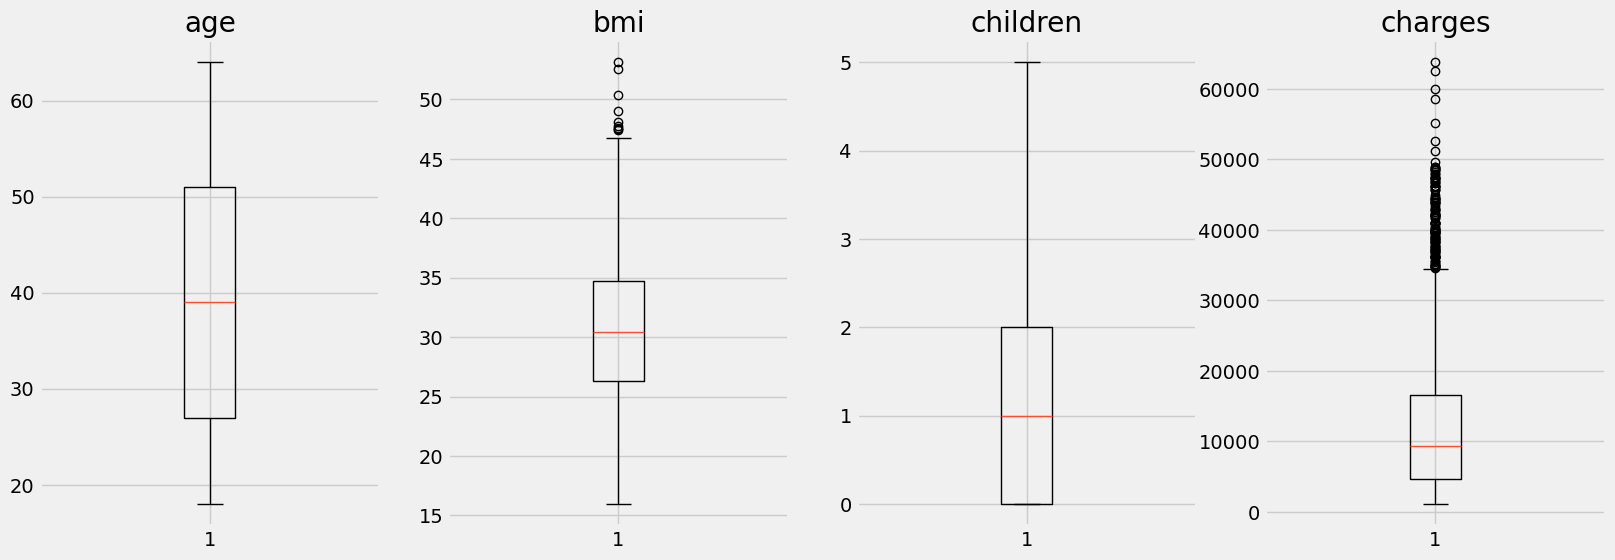

In [22]:
fig,ax=plt.subplots(ncols=4,figsize=(18,6))
for index,content in enumerate(cols):
    ax[index].boxplot(data=data,x=content)
    ax[index].set_title(content)

***`Both BMI and Charges have high outliers.`***

#### **2) Percentiles**

In [23]:
data[['age','bmi','children','charges']].quantile([0.05,0.25,0.5,0.75,1.0])

,age,bmi,children,charges
0.05,18.0,21.25600,0.0,1757.753400
0.25,27.0,26.29625,0.0,4740.287150
0.50,39.0,30.40000,1.0,9382.033000
0.75,51.0,34.69375,2.0,16639.912515
1.00,64.0,53.13000,5.0,63770.428010


#### **3) Histogram**

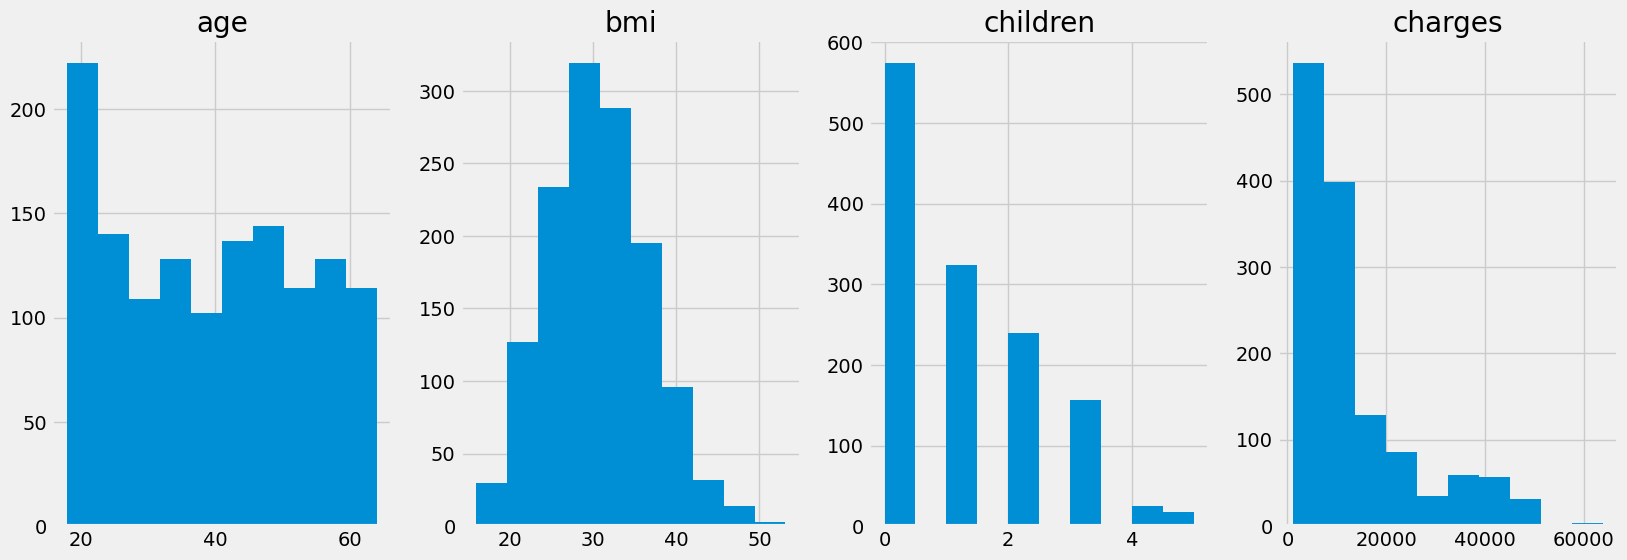

In [24]:
fig,ax=plt.subplots(ncols=4,figsize=(18,6))
for index,content in enumerate(cols):
    ax[index].hist(data=data,x=content)
    ax[index].set_title(content)

## **iv) Explore Two or More Variables**

#### **1) Barplot**

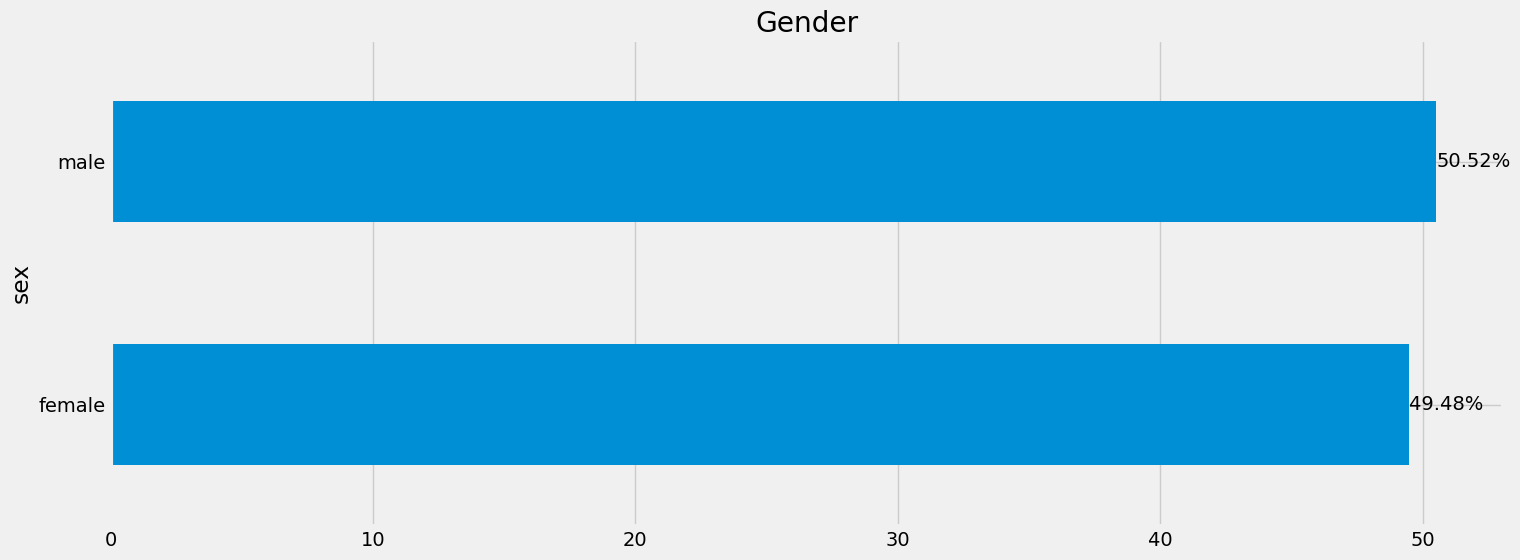

In [26]:
ax=(data['sex'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Gender')
plt.show()

***`Although we have more males compared to females, the difference in their percentages is very small.`***

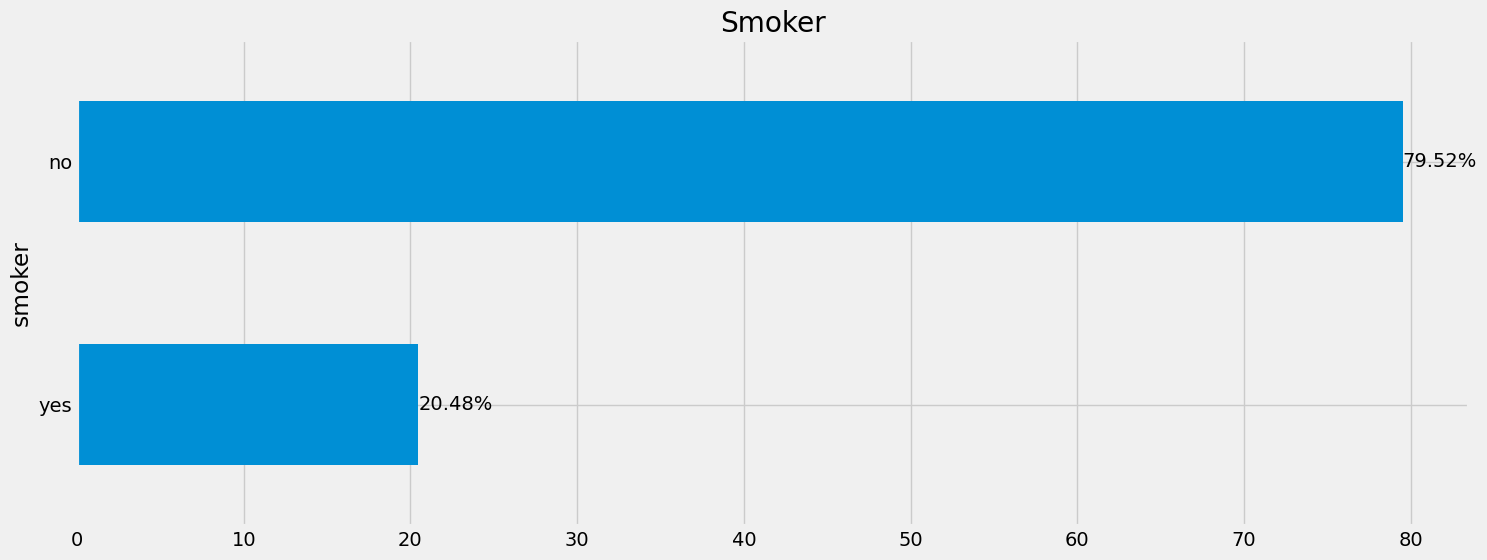

In [27]:
ax=(data['smoker'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Smoker')
plt.show()

***`20% of the population are smokers.`***

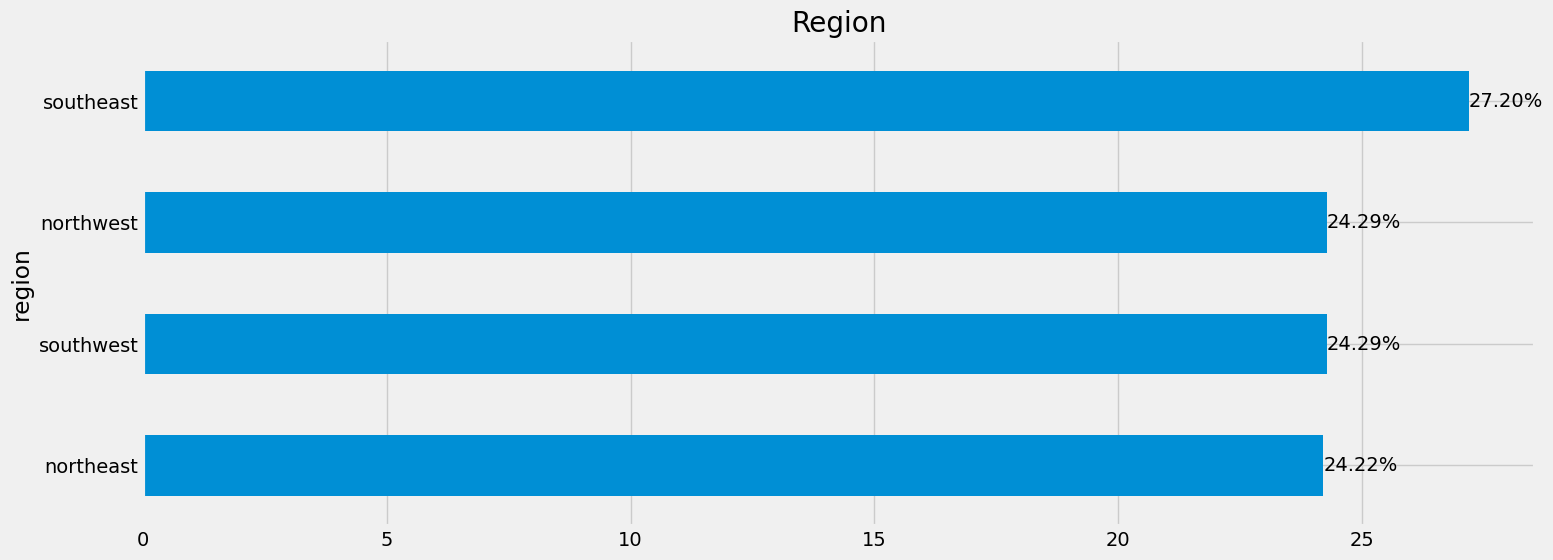

In [28]:
ax=(data['region'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Region')
plt.show()

***`The South East region is more populated compared to the other regions.`***

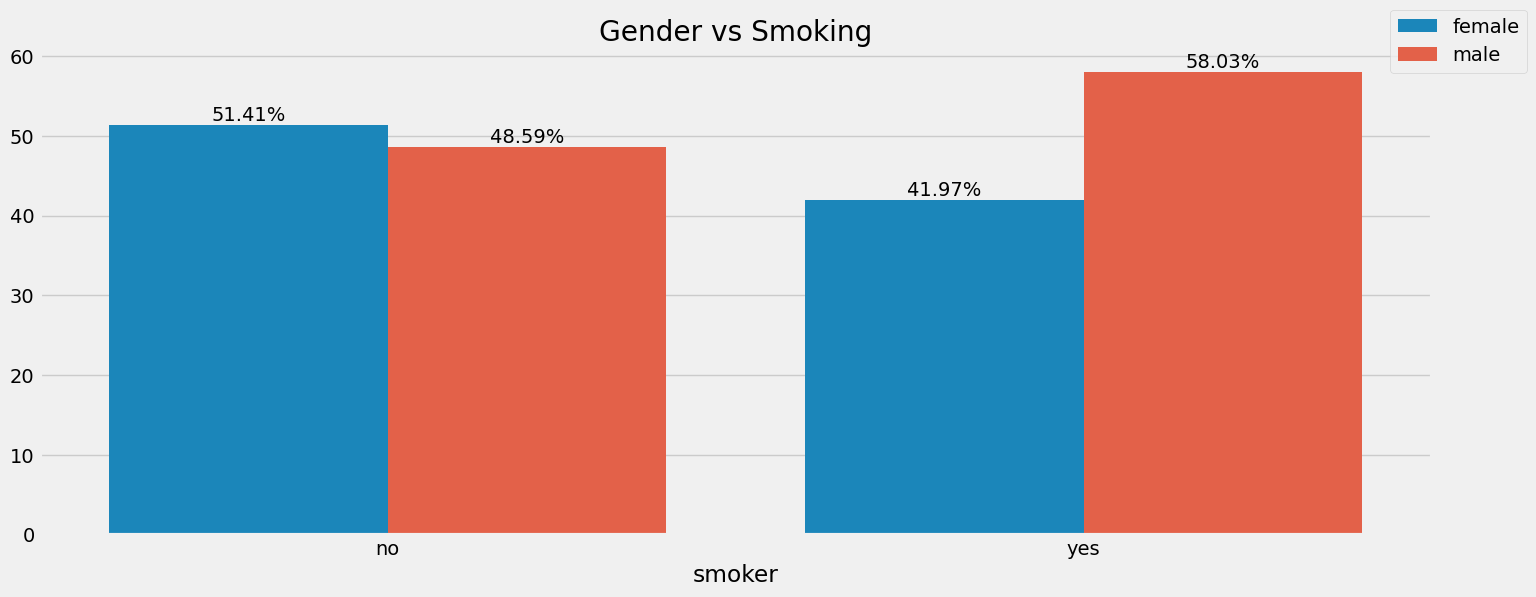

In [29]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(data.groupby('smoker')['sex'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('smoker')['sex'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('smoker')['sex'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.legend(loc=[0.97,0.95])
plt.title('Gender vs Smoking')
plt.show()

***`58% of smokers are Males while Females make up approximately 42%.`***

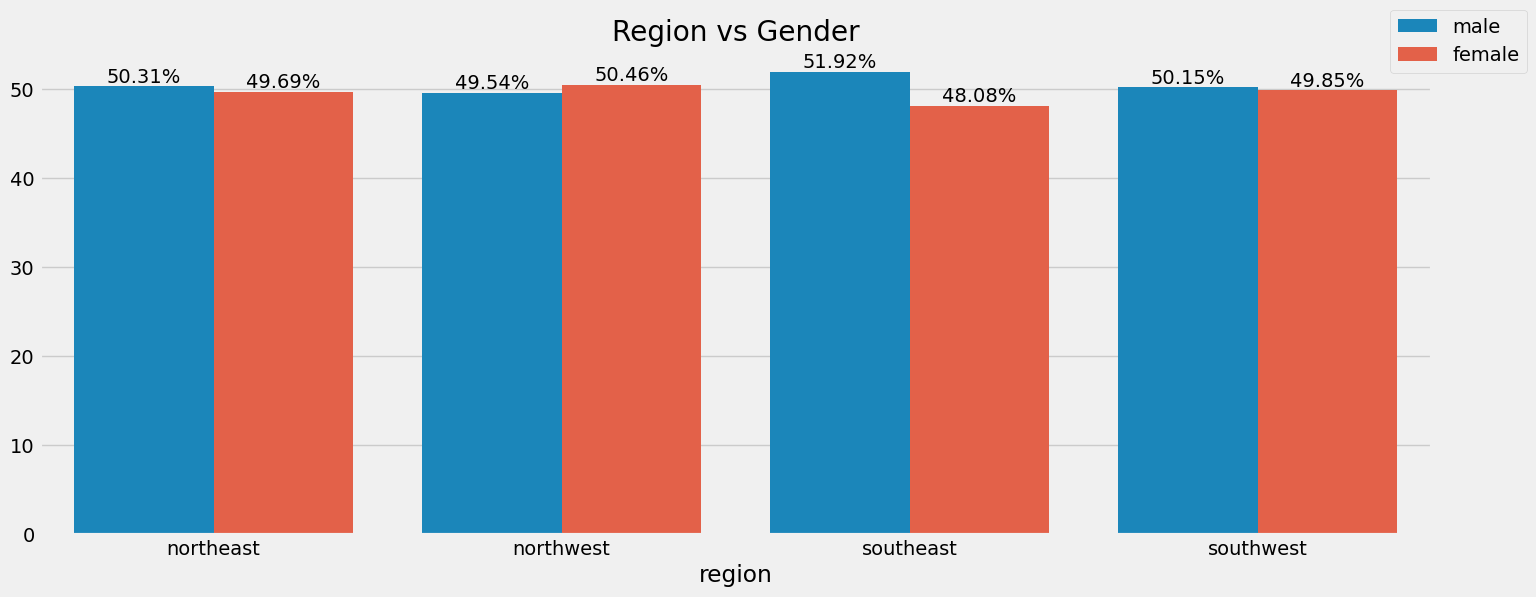

In [30]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(data.groupby('region')['sex'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('region')['sex'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('region')['sex'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.legend(loc=[0.97,0.95])
plt.title('Region vs Gender')
plt.show()

***`Females have a higher percentage in the North West regions contrary to the other regions where Males are more dominant.`***

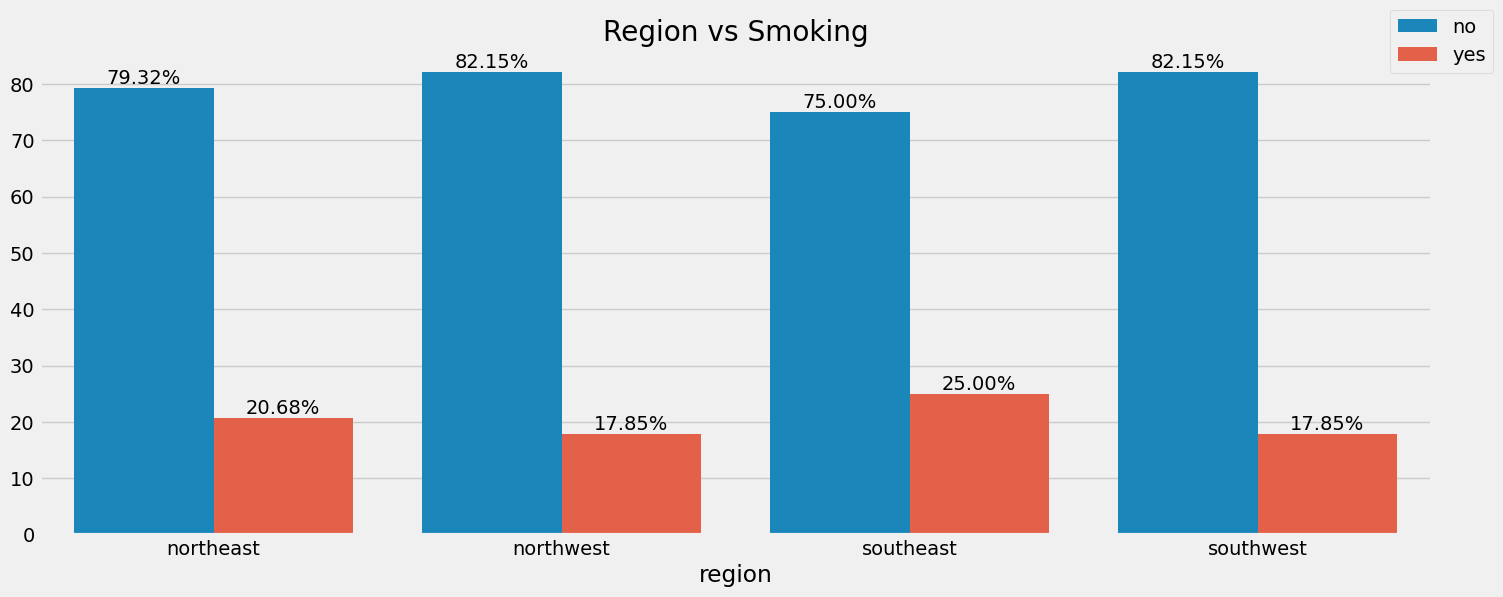

In [31]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(data.groupby('region')['smoker'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(data.groupby('region')['smoker'].value_counts(normalize=True)*100).values,
    hue=(data.groupby('region')['smoker'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.legend(loc=[0.97,0.95])
plt.title('Region vs Smoking')
plt.show()

***`A small percentage of smokers exist in all the regions.`***

#### **2) Correlation**

**i) Correlation Matrix**

In [32]:
data[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


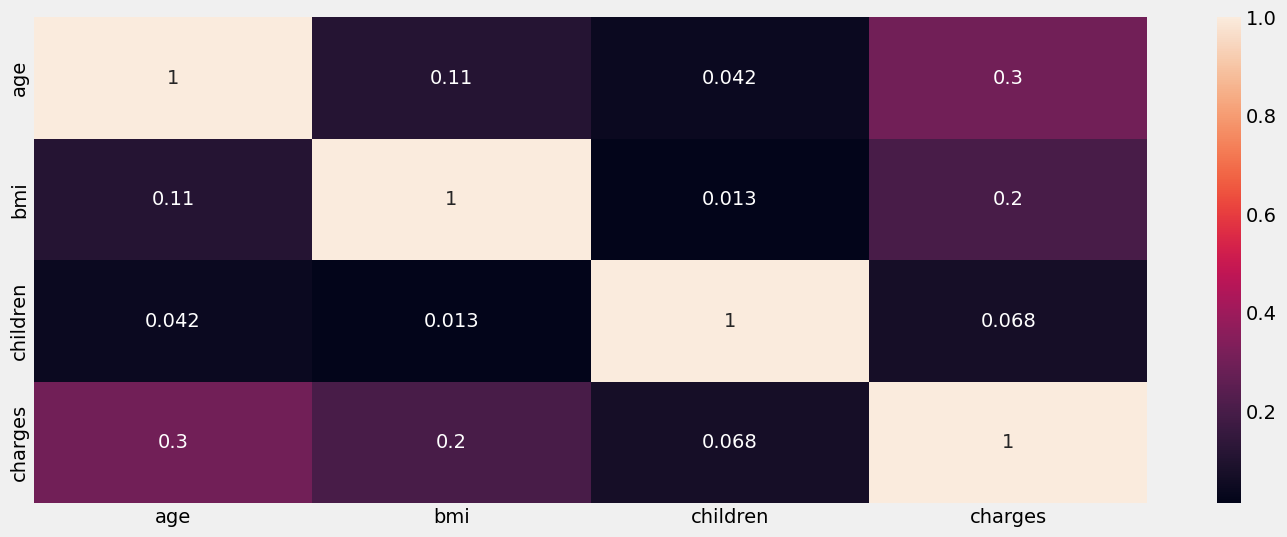

In [33]:
plt.figure(figsize=(16,6))
sns.heatmap(data[['age','bmi','children','charges']].corr(),annot=True)
plt.show()

***`Medical Insurance Charge has a low positive correlation with age, bmi and number of children.`***

**ii) Correlation Coefficient**

In [34]:
import scipy.stats as st
corr,p_value=st.pearsonr(data['age'],data['charges'])
print(f"For Age;\nCorrelation Coeff : {corr}\nP-Value : {p_value:,.5f}")

For Age;
Correlation Coeff : 0.2990081933306476
P-Value : 0.00000


In [35]:
corr,p_value=st.pearsonr(data['bmi'],data['charges'])
print(f"For BMI;\nCorrelation Coeff : {corr}\nP-Value : {p_value:,.5f}")

For BMI;
Correlation Coeff : 0.1983409688336288
P-Value : 0.00000


***`Both Age and BMI have a p-value less than 0.001, thus there is a strong certainty in the correlation coefficient result.`***

In [36]:
corr,p_value=st.pearsonr(data['children'],data['charges'])
print(f"For Number of Children;\nCorrelation Coeff : {corr}\nP-Value : {p_value:,.5f}")

For Number of Children;
Correlation Coeff : 0.0679982268479048
P-Value : 0.01285


***`Number of Children has a p-value less than 0.05, thus there is a moderate certainty in the correlation coefficient result.`***

**iii) Regplot**

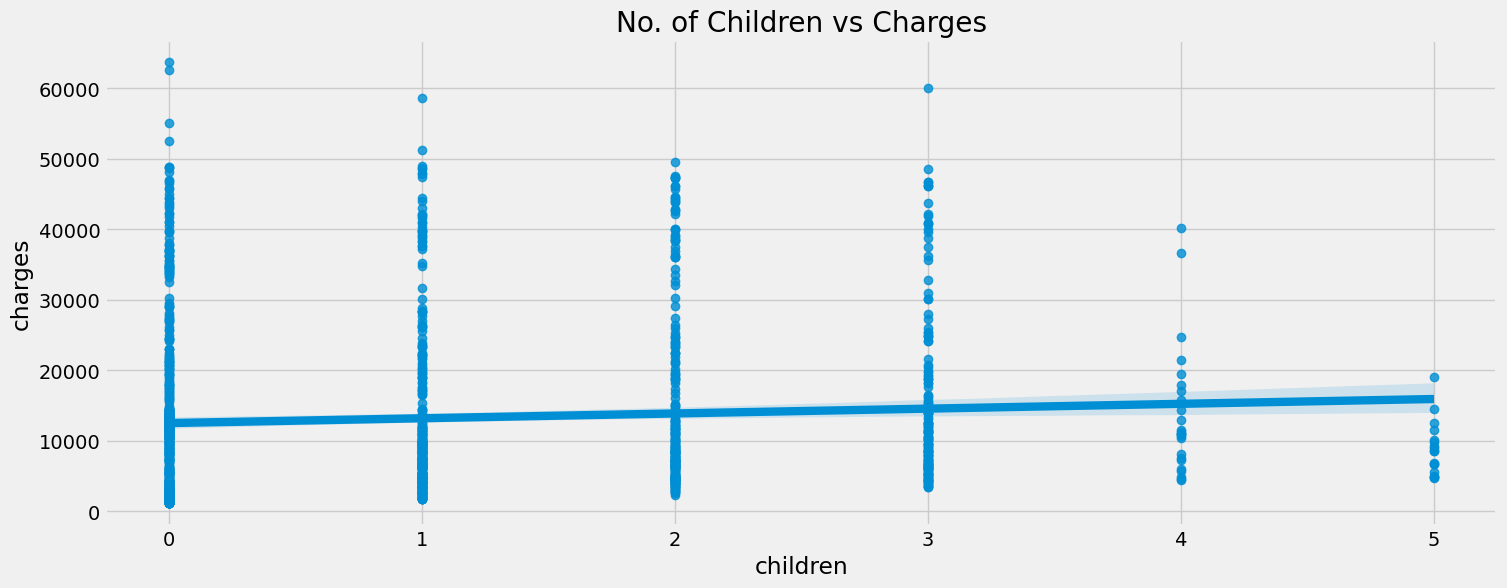

In [37]:
plt.figure(figsize=(16,6))
sns.regplot(x=data['children'],y=data['charges'])
plt.title('No. of Children vs Charges')
plt.show()

***`Low positive correlation between Age and Charges.`***

<Figure size 1600x600 with 0 Axes>

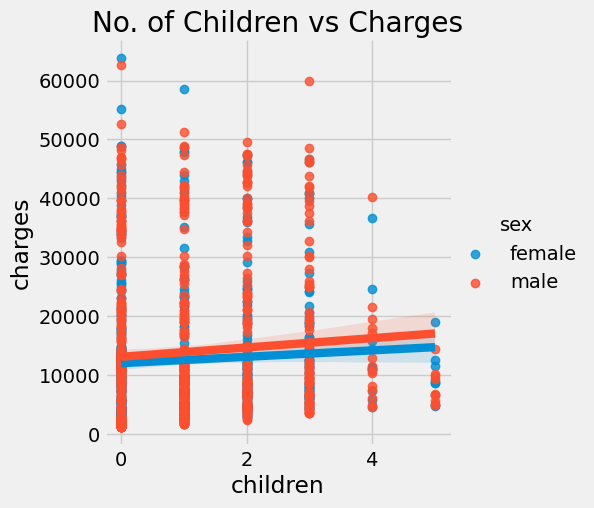

In [38]:
plt.figure(figsize=(16,6))
sns.lmplot(data=data,x='children',y='charges',hue='sex')
plt.title('No. of Children vs Charges')
plt.show()

***`Low positive correlation between Age and Charges for both Males and Females.`***

## **v) Exploring Binary and Categorical Data**

#### **1) Contigency Table**

In [39]:
contigency_table=pd.pivot_table(data=data,index='age',columns=['sex','smoker'],values='charges',fill_value='N/A')
contigency_table.iloc[:5]

sex          female                       male              
smoker           no           yes           no           yes
age                                                         
18      3716.739021  26862.269925  2695.672040  24779.460369
19      3879.902796   24896.85732  3219.922224  29105.608217
20      2483.682380   19522.50555  4862.543470  28615.790730
21      4516.335502    15359.1045  3211.126051  17942.106000
22      2705.702227    34751.5689  2396.333532  38684.146825

***`According to the Contigency table, both male and female smokers tend to pay more charges compared to non-smokers.`***

#### **2) Boxplot**

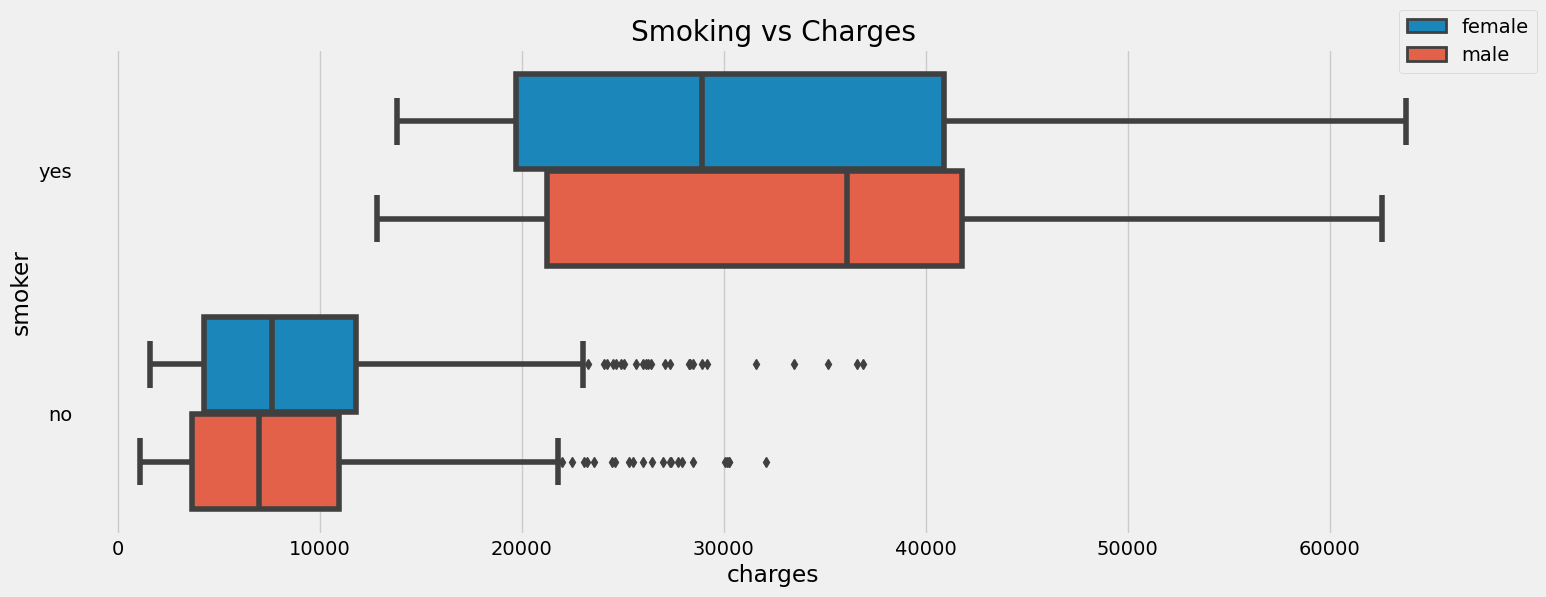

In [40]:
plt.figure(figsize=(16,6))
sns.boxplot(y=data['smoker'],x=data['charges'],hue=data['sex'])
plt.legend(loc=[0.95,0.95])
plt.title('Smoking vs Charges')
plt.show()

***`Charges are high for smokers compared to non-smokers.`***

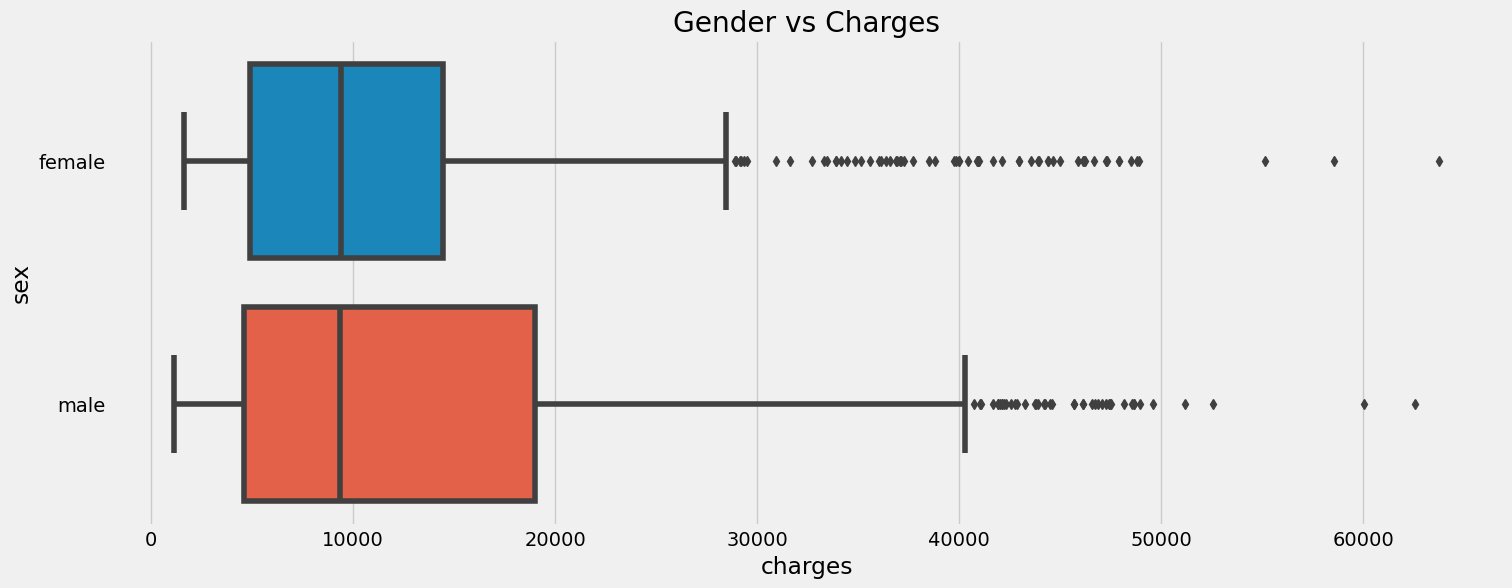

In [41]:
plt.figure(figsize=(16,6))
sns.boxplot(x=data['charges'],y=data['sex'])
plt.title('Gender vs Charges')
plt.show()

***`Insurance charges are high for males compared to females.`***

In [70]:
data.sex = data.sex.astype('category').cat.codes
data.smoker = data.smoker.astype('category').cat.codes
data.region = data.region.astype('category').cat.codes

In [71]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [72]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, )

In [76]:
def accuracy_score(model):
    y_pred = model.predict(X_test)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    mse = (mean_squared_error(y_test, y_pred))
    rmse = np.sqrt(mse)
    print('Training accuracy is ', train_acc)
    print('Testing accuracy is ', test_acc)
    print('Root Mean Square Error is ', rmse)
    return [(train_acc * 100), (test_acc * 100) , rmse]

In [79]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [82]:
accuracy_score(model1)

Training accuracy is  0.7537864181365421
Testing accuracy is  0.7395429321167082
Root Mean Square Error is  6122.784828598575


[75.37864181365421, 73.95429321167082, 6122.784828598575]

In [85]:
model2 = Lasso(10)
model2.fit(X_train, y_train)

Lasso(alpha=10)

In [86]:
accuracy_score(model2)

Training accuracy is  0.7537776653361786
Testing accuracy is  0.7395373225106094
Root Mean Square Error is  6122.85076312372


[75.37776653361786, 73.95373225106094, 6122.85076312372]

In [90]:
model3 = Ridge(0.1)
model3.fit(X_train, y_train)

Ridge(alpha=0.1)

In [91]:
accuracy_score(model3)

Training accuracy is  0.7537861869868094
Testing accuracy is  0.7395396521413855
Root Mean Square Error is  6122.823381055763


[75.37861869868094, 73.95396521413855, 6122.823381055763]

In [94]:
model4 = DecisionTreeRegressor(max_depth = 3)
model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [95]:
accuracy_score(model4)

Training accuracy is  0.8711290163593609
Testing accuracy is  0.7994490012519674
Root Mean Square Error is  5372.709243920384


[87.1129016359361, 79.94490012519674, 5372.709243920384]

In [100]:
model5 = RandomForestRegressor(max_depth = 4)
model5.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

In [101]:
accuracy_score(model5)

Training accuracy is  0.8878220720463544
Testing accuracy is  0.8177984629770475
Root Mean Square Error is  5121.025542271758


[88.78220720463544, 81.77984629770475, 5121.025542271758]

In [106]:
model6 = XGBRegressor(max_depth = 2, learning_rate = 0.1)
model6.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
accuracy_score(model6)

Training accuracy is  0.8901701108064504
Testing accuracy is  0.8265214322550731
Root Mean Square Error is  4996.936583278506


[89.01701108064503, 82.65214322550732, 4996.936583278506]

In [108]:
results = pd.DataFrame(columns = ['Training Accuracy', 'Testing Accuracy', 'Root Mean Squared Error'],
                      index = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
                               'Decision Tree Regression', 'Random Forest Regression', 'XGBoost Regression'])

In [109]:
results.loc['Linear Regression'] = accuracy_score(model1)
results.loc['Lasso Regression'] = accuracy_score(model2)
results.loc['Ridge Regression'] = accuracy_score(model3)
results.loc['Decision Tree Regression'] = accuracy_score(model4)
results.loc['Random Forest Regression'] = accuracy_score(model5)
results.loc['XGBoost Regression'] = accuracy_score(model6)

Training accuracy is  0.7537864181365421
Testing accuracy is  0.7395429321167082
Root Mean Square Error is  6122.784828598575
Training accuracy is  0.7537776653361786
Testing accuracy is  0.7395373225106094
Root Mean Square Error is  6122.85076312372
Training accuracy is  0.7537861869868094
Testing accuracy is  0.7395396521413855
Root Mean Square Error is  6122.823381055763
Training accuracy is  0.8711290163593609
Testing accuracy is  0.7994490012519674
Root Mean Square Error is  5372.709243920384
Training accuracy is  0.8878220720463544
Testing accuracy is  0.8177984629770475
Root Mean Square Error is  5121.025542271758
Training accuracy is  0.8901701108064504
Testing accuracy is  0.8265214322550731
Root Mean Square Error is  4996.936583278506


In [110]:
results

,Training Accuracy,Testing Accuracy,Root Mean Squared Error
Linear Regression,75.378642,73.954293,6122.784829
Lasso Regression,75.377767,73.953732,6122.850763
Ridge Regression,75.378619,73.953965,6122.823381
Decision Tree Regression,87.112902,79.9449,5372.709244
Random Forest Regression,88.782207,81.779846,5121.025542
XGBoost Regression,89.017011,82.652143,4996.936583
